In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [5]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Replace path with your actual dataset location
file_path = '/content/drive/MyDrive/Study Track AI based Student Study Habit Recommender/Milestone1/data/customer_details.csv'
data = pd.read_csv(file_path)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88


In [8]:
features = ['customer_age', 'tenure']
X = data[features]

In [11]:
# Step 5: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
# Step 6: Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


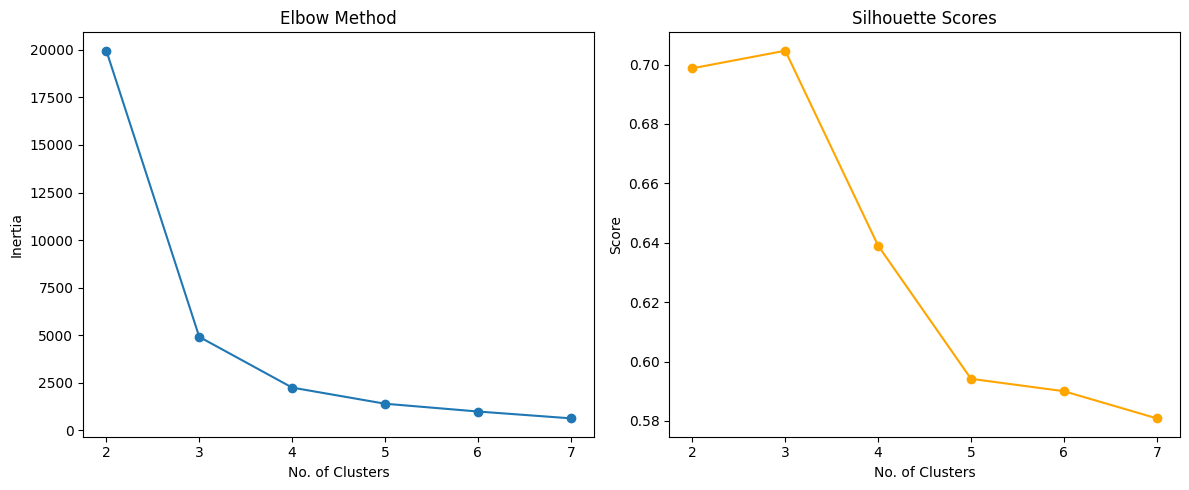

In [13]:
inertia = []
silhouette = []

K = range(2, 8)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(K, silhouette, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


In [14]:
# Let's assume the optimal number of clusters is 3
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

data.head()


,customer_id,sex,customer_age,tenure,Cluster
0,9798859,Male,44.0,93,2
1,11413563,Male,36.0,65,2
2,818195,Male,35.0,129,2
3,12049009,Male,33.0,58,0
4,10083045,Male,42.0,88,2


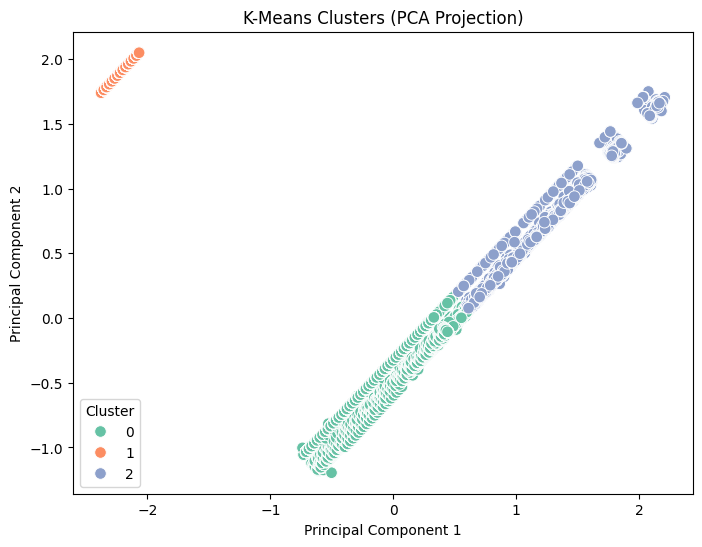

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=data['Cluster'], palette='Set2', s=70)
plt.title('K-Means Clusters (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.savefig('visualizations/cluster_scatter.png')
plt.show()


In [16]:
import os

# Create the visualizations directory if it doesn't exist
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

         customer_age     tenure
Cluster                         
0           60.927523  26.948575
1         2022.000000  36.935300
2           41.768557  92.216716


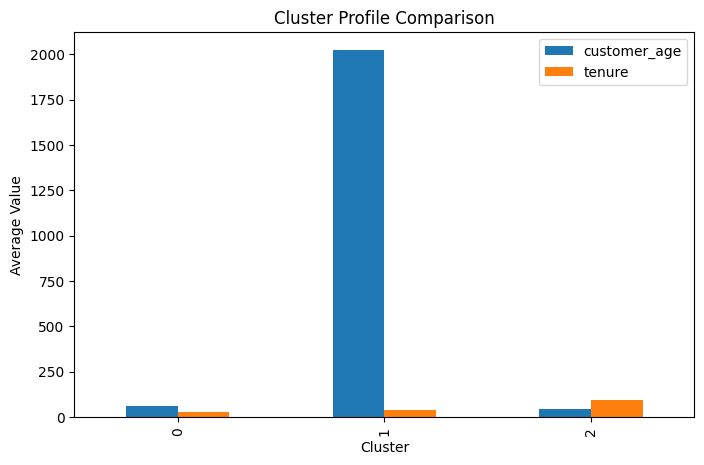

In [18]:
cluster_summary = data.groupby('Cluster')[features].mean()
print(cluster_summary)

# Bar chart comparison
cluster_summary.plot(kind='bar', figsize=(8,5))
plt.title('Cluster Profile Comparison')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.savefig('visualizations/cluster_profile_bar.png')
plt.show()


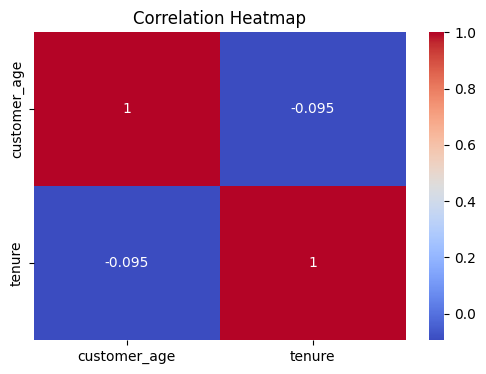

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('visualizations/correlation_heatmap.png')
plt.show()
